# Inaugural Project

Imports and set magics:

In [75]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
from scipy.optimize import minimize

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import our class
from ExchangeEconomy import ExchangeEconomyClass

# We now define our model 
model = ExchangeEconomyClass()

par = model.par

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In [76]:
# Define N
N = 75

# Make a list of (x1,x2) for consumer A
list_A = []

for n1 in range(N+1):
    for n2 in range(N+1):
        list_A.append([n1/N,n2/N])

# Find consumer A and B's utility at the intial endowments
A_endowment = model.utility_A(0.8,0.3)
B_endowment = model.utility_B(0.2,0.7)

liste_A_1 = list_A.copy()

# Remove points which have lower values of utility for consumer A or B than their initial endowments
for i in list_A:
    if model.utility_A(i[0], i[1]) < A_endowment or model.utility_B(1-i[0], 1-i[1]) < B_endowment:
        liste_A_1.remove(i)
liste_A_1

[[0.08, 0.96],
 [0.09333333333333334, 0.88],
 [0.09333333333333334, 0.8933333333333333],
 [0.09333333333333334, 0.9066666666666666],
 [0.09333333333333334, 0.92],
 [0.09333333333333334, 0.9333333333333333],
 [0.09333333333333334, 0.9466666666666667],
 [0.09333333333333334, 0.96],
 [0.10666666666666667, 0.8266666666666667],
 [0.10666666666666667, 0.84],
 [0.10666666666666667, 0.8533333333333334],
 [0.10666666666666667, 0.8666666666666667],
 [0.10666666666666667, 0.88],
 [0.10666666666666667, 0.8933333333333333],
 [0.10666666666666667, 0.9066666666666666],
 [0.10666666666666667, 0.92],
 [0.10666666666666667, 0.9333333333333333],
 [0.10666666666666667, 0.9466666666666667],
 [0.10666666666666667, 0.96],
 [0.12, 0.7866666666666666],
 [0.12, 0.8],
 [0.12, 0.8133333333333334],
 [0.12, 0.8266666666666667],
 [0.12, 0.84],
 [0.12, 0.8533333333333334],
 [0.12, 0.8666666666666667],
 [0.12, 0.88],
 [0.12, 0.8933333333333333],
 [0.12, 0.9066666666666666],
 [0.12, 0.92],
 [0.12, 0.9333333333333333],


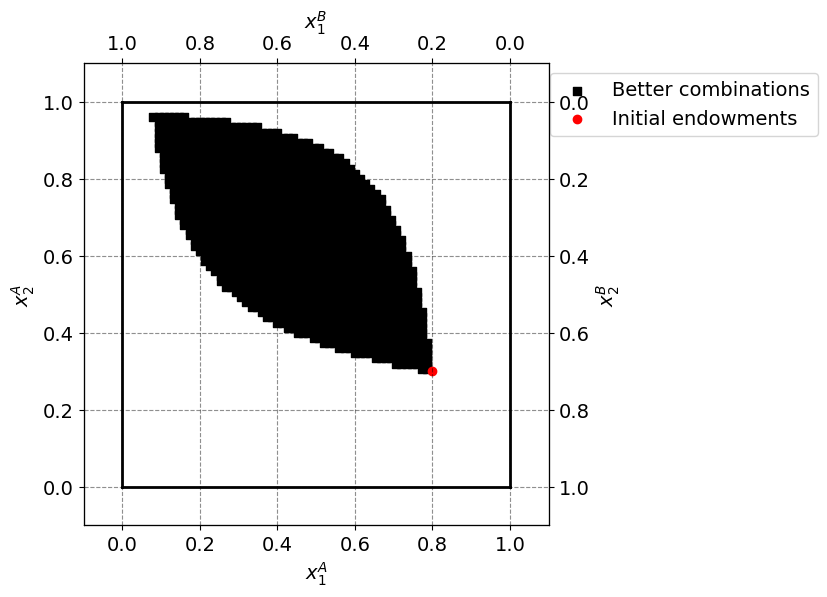

In [77]:
# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting the better combinations of x1 and x2 for consumer A and B
ax_A.scatter([point[0] for point in liste_A_1], [point[1] for point in liste_A_1], marker='s', color='black', label='Better combinations')
ax_A.scatter([0.8], [0.3], marker='o', color='red', label='Initial endowments')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0)); 

This shows the combinations of x1 and x2 for consumer A and B, that leaves both consumers better off or at the same utility as the initial endowments. 

# Question 2

In [78]:
# Define the range of p1 values
p1_values = np.arange(0.5, 2.51, 1/75)
errors = []

# Calculate errors for the range of p1 values
for p1 in p1_values:
    eps1, eps2 = model.check_market_clearing(p1)
    errors.append((p1, eps1, eps2))

# Print the results
print("Errors:")
for error in errors:
    print(f"p1: {error[0]:.2f}, Errors from good 1: {error[1]:.4f}, Errors from good 2: {error[2]:.4f}")



Errors:
p1: 0.50, Errors from good 1: 0.5333, Errors from good 2: -0.2667
p1: 0.51, Errors from good 1: 0.5039, Errors from good 2: -0.2587
p1: 0.53, Errors from good 1: 0.4759, Errors from good 2: -0.2507
p1: 0.54, Errors from good 1: 0.4494, Errors from good 2: -0.2427
p1: 0.55, Errors from good 1: 0.4241, Errors from good 2: -0.2347
p1: 0.57, Errors from good 1: 0.4000, Errors from good 2: -0.2267
p1: 0.58, Errors from good 1: 0.3770, Errors from good 2: -0.2187
p1: 0.59, Errors from good 1: 0.3551, Errors from good 2: -0.2107
p1: 0.61, Errors from good 1: 0.3341, Errors from good 2: -0.2027
p1: 0.62, Errors from good 1: 0.3140, Errors from good 2: -0.1947
p1: 0.63, Errors from good 1: 0.2947, Errors from good 2: -0.1867
p1: 0.65, Errors from good 1: 0.2763, Errors from good 2: -0.1787
p1: 0.66, Errors from good 1: 0.2586, Errors from good 2: -0.1707
p1: 0.67, Errors from good 1: 0.2416, Errors from good 2: -0.1627
p1: 0.69, Errors from good 1: 0.2252, Errors from good 2: -0.1547
p1

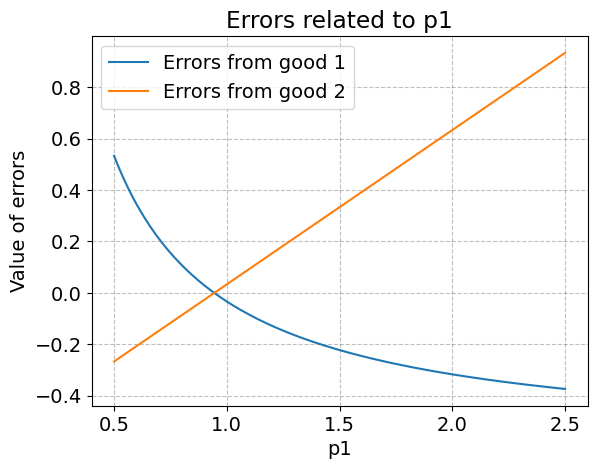

In [79]:
#Convert errors to NumPy array for easier manipulation
errors = np.array(errors)

# We plot the errors to get a better overview 
plt.plot(errors[:, 0], errors[:, 1], label='Errors from good 1')
plt.plot(errors[:, 0], errors[:, 2], label='Errors from good 2')
plt.xlabel('p1')
plt.ylabel('Value of errors')
plt.title('Errors related to p1')
plt.legend()
plt.grid(True)
plt.show()

# Question 3

In [80]:
# We define market_clearing where we return the sum of the absolute values of eps1 and eps2 (the errors for good 1 and 2 at the given proice)
def market_clearing(p1):
    eps1, eps2 = model.check_market_clearing(p1)
    return abs(eps1) + abs(eps2)

# We define an initial guess for p1* (0.5 is the lowest number p1 can obtain)
initial_guess = 0.5

# We now minimize the absoloute values of eps1 and eps2, as the optimal p1 must return errors equal to zero
result = minimize(market_clearing, initial_guess)

# We print the optimal price for p1
print("Optimal price for p1:", result.x)


Optimal price for p1: [0.94444444]


Based on the results we can see that the market clearing price for good 1 is 0.9444

# Question 4.a???

In [104]:
# Define the varibles max_utility_4a and best_price_4a
max_utility_4a = float('-inf')  # We start out with a very low number
best_price_4a = None

# Loop through different prices for p1 in the p1_values vector (defined in question 2)
for p1 in p1_values:
    x1B = min(1,model.demand_B1(p1))
    x2B = min(1,model.demand_B2(p1))

    # Check if demand exceeds 1
    if x1B >= 1 or x2B >= 1:
        continue 

    x1A = max(0, 1 - x1B)  # Ensure good1 is non-negative
    x2A = max(0, 1 - x2B)  # Ensure good2 is non-negative

    # Check if demand exceeds 1
    if x1A >= 1 or x2A >= 1:
        continue 
    
    util_A = model.utility_A(x1A,x2A)
    
    # We save the p1 that yields the highest utility found within the loop
    if util_A > max_utility_4a:
        max_utility_4a = util_A
        best_price_4a = p1    

# Given the best price, we now find consumer A's demand for good 1 and 2
allocation_x1a_4a = model.demand_A1(best_price_4a)
allocation_x2a_4a = model.demand_A2(best_price_4a)

# We print the best price (the p1 that yields the highest utility for consumer A), consumer A's utility and consumer A's demand for good 1 and 2
print("Consumer A's best price for good 1 (best p1):", best_price_4a)
print("Consumer A's utility given p1 (best p1):", max_utility_4a)
print("Allocation of x1a:", allocation_x1a_4a)
print("Allocation of x2a:", allocation_x2a_4a)

test = model.demand_A2(1.8999999999999972)
print(test)

Consumer A's best price for good 1 (best p1): 1.8999999999999972
Consumer A's utility given p1 (best p1): 0.6336208378614051
Allocation of x1a: 0.31929824561403514
Allocation of x2a: 1.213333333333332
1.213333333333332


# Question 4.b???

In [89]:
# We do the same as in question 4.a, but we define a new range of p1 values, called p1_values_4b
p1_values_4b = np.arange(0.1, 100, 1/1000)

# Define the variables max_utility_4b and best_price_4b
max_utility_4b = float('-inf')  # We start out with a very low number
best_price_4b = None

# Loop through different prices for p1 in p1_values_4b
for p1 in p1_values_4b:
    x1B = min(1,model.demand_B1(p1))
    x2B = min(1,model.demand_B2(p1))
    good1 = max(0, 1 - x1B)  # Ensure good1 is non-negative
    good2 = max(0, 1 - x2B)  # Ensure good2 is non-negative
    util_A = (good1 ** par.alpha) * (good2 ** (1 - par.alpha))
    
    # We save the p1 that yields the highest utility found within the loop
    if util_A > max_utility_4b:
        max_utility_4b = util_A
        best_price_4b = p1    

# Given the best price, we now find consumer A's demand for good 1 and 2
allocation_x1a_4b = model.demand_A1(best_price_4b)
allocation_x2a_4b = model.demand_A2(best_price_4b)

# We print the best price (the p1 that yields the highest utility for consumer A), consumer A's utility and consumer A's demand for good 1 and 2
print("Consumer A's best price for good 1 (best p1):", best_price_4b)
print("Consumer A's utility given p1 (best p1):", max_utility_4b)
print("Allocation of x1a:", allocation_x1a_4b)
print("Allocation of x2a:", allocation_x2a_4b)

Consumer A's best price for good 1 (best p1): 1.8990000000000018
Consumer A's utility given p1 (best p1): 0.6336208470908343
Allocation of x1a: 0.3193259610321221
Allocation of x2a: 1.2128000000000012


# Question 5.a

In [83]:
# Initialize variables to store results
best_utility_A = float('-inf')
best_allocation_x1a_5a = None
best_allocation_x2a_5a = None

# Iterate over the choices for (x1A, x2A) in C (liste_A_1 is found in question 1)
for x1A, x2A in liste_A_1:
    # Calculate A's utility
    utility_A = model.utility_A(x1A, x2A)
    
    # Calculate B's utility given the proposed allocation for A
    utility_B_given = model.utility_B(1 - x1A, 1 - x2A)
    
    # Check if B's utility is at least as high as from the initial endowment (found in question 1)
    if utility_B_given >= B_endowment :
        # Update best utility and allocation for the two goods if A's utility is higher
        if utility_A > best_utility_A:
            best_utility_A = utility_A
            best_allocation_x1a_5a = x1A
            best_allocation_x2a_5a = x2A

# We print the allocations, utility and utility at initial endowment for conusmer A
print("Best allocation for consumer A - Good 1:", best_allocation_x1a_5a)
print("Best allocation for consumer A - Good 2:", best_allocation_x2a_5a)
print("Consumer A's utility:", best_utility_A)
print("Conusumer A's utility at intitial endowment:", A_endowment)

# We print the allocations, utility and utility at initial endowment for conusmer B
best_allocation_x1b_5a = 1 - best_allocation_x1a_5a
best_allocation_x2b_5a = 1 - best_allocation_x2a_5a
best_utility_B = model.utility_B(best_allocation_x1b_5a, best_allocation_x2b_5a)
print("Best allocation for consumer B - Good 1:", best_allocation_x1b_5a)
print("Best allocation for consumer B - Good 2:", best_allocation_x2b_5a)
print("Consumer B's utility:", best_utility_B)
print("Consumer B's utility at initial endowment:", B_endowment)


Best allocation for consumer A - Good 1: 0.56
Best allocation for consumer A - Good 2: 0.8533333333333334
Consumer A's utility: 0.7415523509091093
Conusumer A's utility at intitial endowment: 0.41601676461038084
Best allocation for consumer B - Good 1: 0.43999999999999995
Best allocation for consumer B - Good 2: 0.1466666666666666
Consumer B's utility: 0.30507896071427915
Consumer B's utility at initial endowment: 0.3036588971875663


# Question 5.b

In [84]:
# Define the objective function for optimization
def objective(x):
    x1A, x2A = x
    # Objective function is A's utility, which we want to maximize
    return -model.utility_A(x1A, x2A)

# Define the constraint, so we ensure that B's utility is at least as high as the utility at the initial endowment
def constraint_B_utility(x):
    x1A, x2A = x
    # Calculate B's utility given A's allocation 
    utility_B_given = model.utility_B(1 - x1A, 1 - x2A)
    # Return the difference between B's utility and his utility at the initial endowment
    return utility_B_given - B_endowment

# Define the constraints for the optimization
constraints = [{'type': 'ineq', 'fun': constraint_B_utility}]

# We now solve the minimization problem, we maximize A's utility but ensure that B's utility is at least as high as at the initial endowment
result_5b = minimize(objective, [0.1, 0.1], method='SLSQP', bounds=[(0, 1), (0, 1)], constraints=constraints)

# Check if the optimization was successful and output results for 5b
allocation_5b = result_5b.x if result_5b.success else None

# Print the best allocation
print("Best allocation for consumer A:", allocation_5b)

# We calculate the utility for consumer A and B
utility_A_5b = model.utility_A(allocation_5b[0], allocation_5b[1])
utility_B_5b = model.utility_B(1 - allocation_5b[0], 1 - allocation_5b[1])

print("Utility for consumer A:", utility_A_5b)
print("Utility for consumer B:", utility_B_5b)

Best allocation for consumer A: [0.57574506 0.84443775]
Utility for consumer A: 0.7432276089282225
Utility for consumer B: 0.3036588957984514


If we compare 5.a and 5.b with their utility from initial endowments we find consumers B utility to be almost the same. The utility for consumer A has risen in both but mostly in 5.b since the products can be bought in more combinations (the restrictions for consumer A are not as strict in 5.b)

# Question 6.a

In [85]:
# The utility function for consumer A plus consumer B
def aggregate_utility(x):
    x1A, x2A = x
    x1B = 1 - x1A
    x2B = 1 - x2A
    return model.utility_A(x1A, x2A) + model.utility_B(x1B, x2B)

# Initial guess
initial_guess = [par.w1A, par.w2A]

# There is a total of 1 of x1 and x2.
bounds = [(0, 1), (0, 1)]

# Set op the maximization problem
result = minimize(
    lambda x: -aggregate_utility(x), 
    initial_guess,
    bounds=bounds)

# The results 
if result.success:
    optimal_x1A = result.x[0]
    optimal_x2A = result.x[1]
    optimal_x1B = 1 - optimal_x1A
    optimal_x2B = 1 - optimal_x2A
    optimal_aggregate_utility = -result.fun
else:
    optimal_x1A = optimal_x2A = optimal_x1B = optimal_x2B = optimal_aggregate_utility = None

print("Optimal x1A:", optimal_x1A, "Optimal x2A:", optimal_x2A)
print("Optimal x1B:", optimal_x1B,"Optimal x2B:", optimal_x2B)


Optimal x1A: 0.3333341514009324 Optimal x2A: 0.6666676011670838
Optimal x1B: 0.6666658485990675 Optimal x2B: 0.3333323988329162


# Question 6.b ???

We have not made question 6.b since we need the results from question 4.a and 4.b

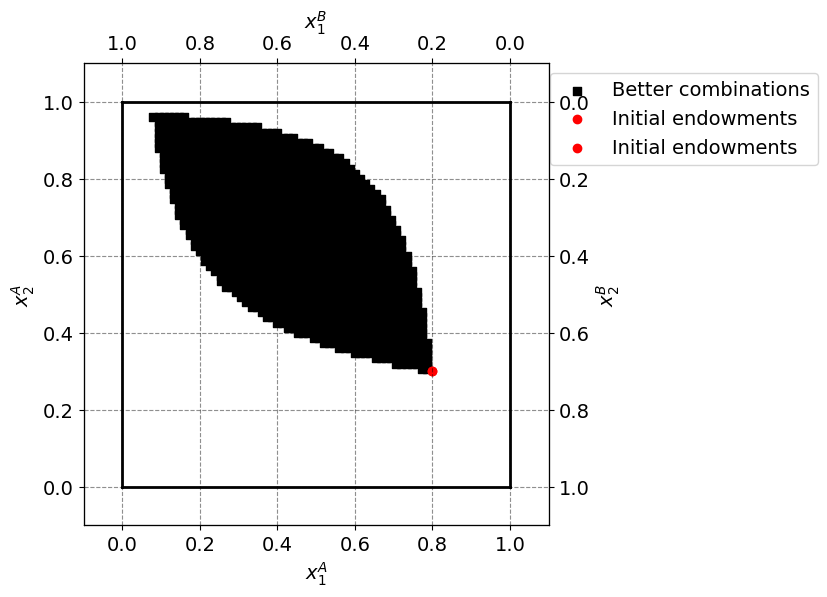

In [86]:
# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting the better combinations of x1 and x2 for consumer A and B
ax_A.scatter([point[0] for point in liste_A_1], [point[1] for point in liste_A_1], marker='s', color='black', label='Better combinations')
# Initial endowment
ax_A.scatter([0.8], [0.3], marker='o', color='red', label='Initial endowments')
# 4b
ax_A.scatter([0.8], [0.3], marker='o', color='red', label='Initial endowments')
# 5b
# 6a

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 7

In [87]:
# Generate 50 different initial endowments
np.random.seed(0)  # Set the seed for reproducibility
initial_endowments_A = np.random.uniform(0, 1, (50, 2))

# We print the results
print(initial_endowments_A)

[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]
 [0.79172504 0.52889492]
 [0.56804456 0.92559664]
 [0.07103606 0.0871293 ]
 [0.0202184  0.83261985]
 [0.77815675 0.87001215]
 [0.97861834 0.79915856]
 [0.46147936 0.78052918]
 [0.11827443 0.63992102]
 [0.14335329 0.94466892]
 [0.52184832 0.41466194]
 [0.26455561 0.77423369]
 [0.45615033 0.56843395]
 [0.0187898  0.6176355 ]
 [0.61209572 0.616934  ]
 [0.94374808 0.6818203 ]
 [0.3595079  0.43703195]
 [0.6976312  0.06022547]
 [0.66676672 0.67063787]
 [0.21038256 0.1289263 ]
 [0.31542835 0.36371077]
 [0.57019677 0.43860151]
 [0.98837384 0.10204481]
 [0.20887676 0.16130952]
 [0.65310833 0.2532916 ]
 [0.46631077 0.24442559]
 [0.15896958 0.11037514]
 [0.65632959 0.13818295]
 [0.19658236 0.36872517]
 [0.82099323 0.09710128]
 [0.83794491 0.09609841]
 [0.97645947 0.4686512 ]
 [0.97676109 0.60484552]
 [0.73926358 0.03918779]
 [0.28280696 0.12019656]
 [0.2961402  0.11872772]


# Question 8

We cannot code the market equilibriums and therefore we have plottet the 50 different initial endowments. 

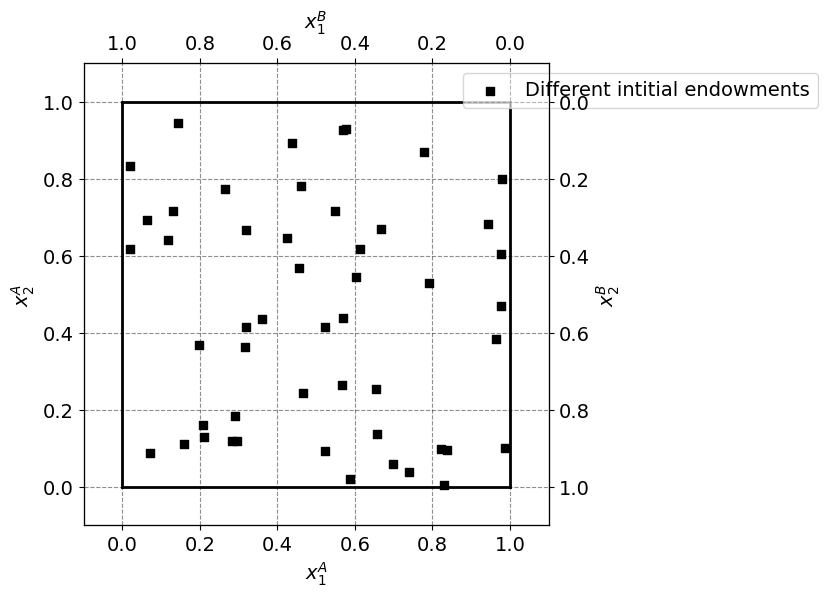

In [88]:
# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting the better combinations of x1 and x2 for consumer A and B
#ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.scatter([point[0] for point in initial_endowments_A], [point[1] for point in initial_endowments_A], marker='s', color='black', label='Different intitial endowments')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));